# Emotions Detection in Text

In [39]:
import pandas as pd
import numpy as np
import nltk 

import joblib

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Loading ML pkgs
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

# Data Transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score

import matplotlib.pyplot as plt

## Data Loading and Visualization

This section of the notebook is dedicated to the exploration and visualization of the emotion datasets.
We will be loading multiple datasets that contain text and their corresponding emotional labels.
The datasets include:

1. **Text Emotions Dataset**: This dataset contains various text samples along with their associated emotions.
2. **Emotion Phrases Dataset**: This dataset includes phrases that are categorized by different emotions.
3. **Emotion Words Dataset**: This dataset consists of individual words that are linked to specific emotions.

After loading the datasets, we will perform the following operations:
- **Renaming Columns**: We will ensure that the columns are consistently named across datasets for easier merging.
- **Concatenating Datasets**: We will combine all the datasets into a single DataFrame for comprehensive analysis.
- **Sampling Data**: A random sample of the combined dataset will be displayed to give an overview of the data structure and content.

This exploration will help us understand the distribution of emotions in the datasets and prepare for further data cleaning and analysis.


### Loading the Data

In [40]:
# Load Dataset
df1 = pd.read_csv("./data/input/text_emotions.csv")

# Add another dataset on top of this
df2 = pd.read_csv("./data/input/Emotion Phrases.csv")
# Rename the "Word" column to "Text"

df3 = pd.read_csv("./data/input/Emotion Words.csv")
df3 = df3.rename(columns={"Word": "Text"})

df1.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [41]:
df2.head()

,Emotion,Text
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [16]:
df3.head()

,Text,Emotion
0,abhor,anger
1,abhorr,anger
2,abhorr,disgust
3,abhorrence,anger
4,abhorrent,disgust


In [17]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.sample(10)

,Text,Emotion
20578,When my brother was very late in arriving home...,fear
26563,I felt disgust when I received visitors at an ...,disgust
9451,im still feeling terrible even though ive had ...,sadness
3674,i feel more content with what i have achieved ...,joy
25842,A party with no worries (i.e. no tests homewor...,joy
22483,I felt joy when I entered at the University.,joy
16821,i don t know how i feel i guess it s one of th...,love
18872,i feel that he was completely humiliated and h...,sadness
13120,i just want people to leave me alone and not m...,sadness
17322,i started to feel so overwhelmed,fear


### Dataset Visualization

In [18]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         8406
sadness     7165
anger       4158
fear        3661
love        1641
disgust     1164
shame       1094
guilt       1091
surprise     814
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

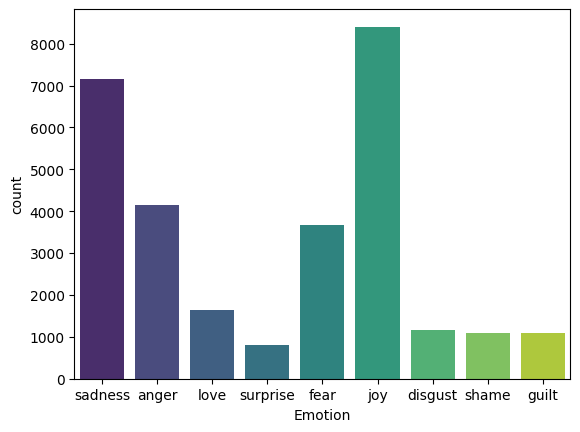

In [19]:
# Plot
sns.countplot(x='Emotion',data=df, palette='viridis', hue='Emotion')

### Cleaning the data

### Stemming (Morphological Analysis)

Stemming is a text normalization technique that reduces words to their root form. This process involves reducing complex words into their root morphemes.

This process helps in treating different forms of a word as the same, which is particularly useful in text analysis. 
For example, words like "running", "ran", and "runner" would all be reduced to the root word "run". 
By applying stemming, we can improve the efficiency of our emotion detection model by reducing the dimensionality of the text data, 
allowing it to focus on the core meaning of the words rather than their variations.


In [20]:
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = '.'.join([ps.stem(word) for word in text.split()])
  return text

This section of the notebook is dedicated to the data cleaning process. 
Data cleaning is a crucial step in preparing the dataset for analysis and modeling. 
In this part, we will perform several operations to ensure that the text data is in a suitable format for further processing. 
The operations include:

1. **Removing Punctuations**: Punctuations can interfere with text analysis, so we will remove them from the text.
2. **Removing User Handles**: Since the dataset originates from social media, user handles (e.g., @username) will be removed to avoid bias in the analysis.
3. **Removing Stopwords**: Common words that do not contribute to the meaning of the text (e.g., "and", "the") will be eliminated.
4. **Removing Digits**: Any numerical values will be removed as they may not be relevant to the emotional content of the text.
5. **Removing Special Characters**: Special characters that do not add value to the analysis will be removed.
6. **Stemming**: Words will be reduced to their root form to ensure that different forms of a word are treated as the same (e.g., "running" becomes "run").

After these cleaning steps, we will have a more uniform and relevant dataset that is ready for emotion detection analysis.


In [21]:
df['Clean_Text'] = df['Text']

# Remove punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

# User handles - Remove User Handles from Text Data
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles) # Since the dataset is from social media, we can remove user handles without much loss of information

# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

# Remove Digits
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_numbers)

# Remove Special Characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

# Stemming
df['Clean_Text'] = df['Clean_Text'].apply(stemmer)

df.head()


,Text,Emotion,Clean_Text
0,i didnt feel humiliated,sadness,didnt.feel.humili
1,i can go from feeling so hopeless to so damned...,sadness,feel.hopeless.damn.hope.care.awak
2,im grabbing a minute to post i feel greedy wrong,anger,im.grab.minut.post.feel.greedi.wrong
3,i am ever feeling nostalgic about the fireplac...,love,feel.nostalg.fireplac.know.properti
4,i am feeling grouchy,anger,feel.grouchi


### Stemming

We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [22]:
# remove empty rows
df = df[df['Clean_Text'] != '']
df

,Text,Emotion,Clean_Text
0,i didnt feel humiliated,sadness,didnt.feel.humili
1,i can go from feeling so hopeless to so damned...,sadness,feel.hopeless.damn.hope.care.awak
2,im grabbing a minute to post i feel greedy wrong,anger,im.grab.minut.post.feel.greedi.wrong
3,i am ever feeling nostalgic about the fireplac...,love,feel.nostalg.fireplac.know.properti
4,i am feeling grouchy,anger,feel.grouchi
...,...,...,...
29189,yucky,disgust,yucki
29190,zeal,joy,zeal
29191,zealous,joy,zealou
29192,zest,joy,zest


In [23]:
# delete duplicates
df = df.drop_duplicates()

In [24]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

### Building the model pipeline

We need to prepare a pipeline for the tokenizer and the classification model together.

In [25]:
# LogisticRegression Pipeline
# pipe_lr = Pipeline(steps=[('cv',CountVectorizer(ngram_range=(1,4))),('lr',LogisticRegression(penalty='l2', C=1.0, max_iter=500, random_state=42))])
pipe_lr = Pipeline(steps=[('tf',TfidfVectorizer(ngram_range=(1,4))),('lr',LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42))], verbose=True)

In [52]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

[Pipeline] ................ (step 1 of 2) Processing tf, total=   3.1s
[Pipeline] ................ (step 2 of 2) Processing lr, total= 1.8min


Pipeline(steps=[('tf', TfidfVectorizer(ngram_range=(1, 4))),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))],
         verbose=True)

### Testing the model and visualizing the results

In [55]:
# Check Accuracy and Classification Report
pipe_lr.score(x_test,y_test)

# Classification Reportev

# Evaluate the model
y_pred = pipe_lr.predict(x_test)

# Print the accuracy
print("Accuracy:", pipe_lr.score(x_test, y_test))


Accuracy: 0.7413526071244192


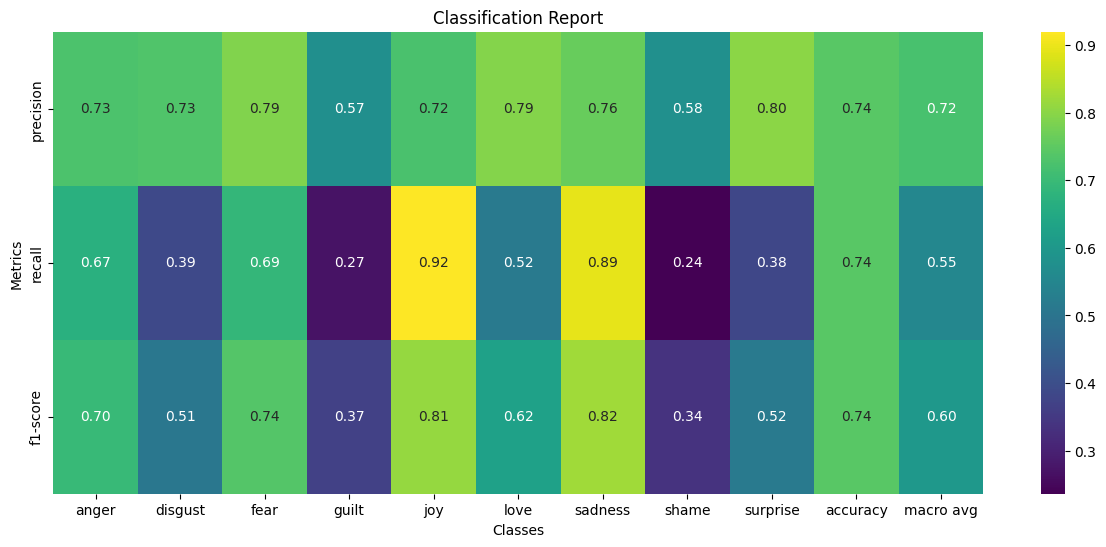

In [56]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True, target_names=pipe_lr.classes_)
report['accuracy'] = accuracy_score(y_test, y_pred)
report['macro avg']['f1-score'] = f1_score(y_test, y_pred, average='macro')
report['weighted avg']['f1-score'] = f1_score(y_test, y_pred, average='weighted')

# Create a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
# Plotting the classification report
plt.figure(figsize=(15, 6))
sns.heatmap(report_df.iloc[:-1, :].T.drop('support'), annot=True, fmt='.2f', cmap='viridis', cbar=True)
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.show()


In [58]:
# Saving the model
model_path = "./emotion_classifier.joblib"
joblib.dump(pipe_lr, model_path)

['./emotion_classifier.joblib']

In [59]:
# Function to use the trained model to predict the emotion of a given paragraph (not a single sentence)
# Model works with only sentences, so we need to split the paragraph into sentences and then predict the 
# emotion of each sentence. Then, we can find the average emotion of the paragraph, and the percentage of each emotion in the paragraph.

nltk.download("punkt_tab")
def predict_text_emotion(text: str, model_path: str) -> tuple:
    # Load the model
    model = joblib.load(model_path)

    # Split the text into sentences
    sentences = nltk.tokenize.sent_tokenize(text)

    # Predict the probabilities of each emotion for each sentence
    probabilities = [model.predict_proba([sentence]) for sentence in sentences]

    # Predict the most likely emotion for each sentence
    emotions = [model.predict([sentence]) for sentence in sentences]

    # Return the probabilities of the emotions over the entire text(average of the probabilities of each sentence) and the most likely emotion
    # Return it in json format: {"probabilities": {emotion: probability}, "top_emotion": emotion}
    # Calculate the average probabilities for each emotion
    avg_probabilities = {}
    for prob in probabilities:
        for emotion, value in zip(model.classes_, prob[0]):
            if emotion not in avg_probabilities:
                avg_probabilities[emotion] = 0
            avg_probabilities[emotion] += value / len(probabilities)

    # Determine the most likely emotion for the entire text
    top_emotion = max(avg_probabilities, key=avg_probabilities.get)

    # Return the result in the specified format
    return {
        "probabilities": avg_probabilities,
        "top_emotion": top_emotion
    }

# Test the function
paragraph = "The sun was shining brightly in the sky. The birds were chirping. The flowers were blooming. The children were playing in the park. The world seemed like an ok place."

print("Paragraph: ", paragraph)
pred = predict_text_emotion(paragraph, model_path)
print("Emotion Probabilities: ", pred["probabilities"])
print("Predicted Emotion: ", pred["top_emotion"])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Xeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Paragraph:  The sun was shining brightly in the sky. The birds were chirping. The flowers were blooming. The children were playing in the park. The world seemed like an ok place.
Emotion Probabilities:  {'anger': 0.13715780294292915, 'disgust': 0.04925820684163745, 'fear': 0.10143760389220297, 'guilt': 0.05123577482394171, 'joy': 0.35967189125646415, 'love': 0.047101670178699304, 'sadness': 0.1742053338305293, 'shame': 0.05221825983742279, 'surprise': 0.027713456396173168}
Predicted Emotion:  joy
